<a href="https://colab.research.google.com/github/Sibahle01/Weather-Prediction-Project-/blob/main/Fever_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np

a = np.array([1,2,3])
b = np.array([3,4,5])

a*b


array([ 3,  8, 15])

In [44]:
a.ndim

1

In [45]:
np.random.rand(4,4)

array([[0.01814275, 0.82843061, 0.12473172, 0.14592063],
       [0.52416613, 0.22795499, 0.51349302, 0.66292552],
       [0.04841087, 0.00231586, 0.50685441, 0.55977069],
       [0.19931481, 0.64869788, 0.84255178, 0.91378644]])

In [46]:
a = np.array([0,1,2,3,4,5,6,7,8,9])

In [47]:
np.ndim(a)

1

In [48]:
b = np.ones([3,4])
print(b)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [49]:
c = np.array([1, 2, 3])
d = np.array([4, 5, 6])
c + d

array([5, 7, 9])

In [50]:
c * 3

array([3, 6, 9])

In [51]:
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [52]:
arr[::-1]

array([[7, 8, 9],
       [4, 5, 6],
       [1, 2, 3]])

In [53]:
arr[1,:-1]

array([4, 5])

In [54]:
arr = np.array([[1, 2], [3, 4]])

np.shape(arr)
np.size(arr)

4

In [55]:
arr.dtype

dtype('int64')

In [56]:
A = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])

A * b

array([[27,  8],
       [ 9, 16]])

In [57]:
arr = np.array([[4, 5, 6], [7, 8, 9]])
F = np.array([1, 2, 3])
arr + F


array([[ 5,  7,  9],
       [ 8, 10, 12]])

In [58]:
arr = np.array([1, 2, 3, 4, 5])

np.mean(arr)

3.0

In [59]:
np.max(arr)

5

In [60]:
np.median(arr)

3.0

In [61]:
arr = np.array([3, 7, 2, 9, 1, 6])
arr[arr>5]

array([7, 9, 6])

In [62]:
arr = np.array([9, 3, 1, 7, 4])
np.sort(arr)

array([1, 3, 4, 7, 9])

In [63]:
max_index = np.argmax(arr)
max_index

0

In [64]:
np.random.rand(3,3)

array([[0.99311889, 0.71989313, 0.4299783 ],
       [0.21960026, 0.08356777, 0.8857433 ],
       [0.71029723, 0.79736609, 0.46319231]])

In [65]:
rand_ints = np.random.randint(10, 50, size=5)

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


data_path = '/content/drive/MyDrive/archive (13)/enhanced_fever_medicine_recommendation.csv'
data = pd.read_csv(data_path)


data['Previous_Medication'].fillna("None", inplace=True)


target = 'Fever_Severity'
features = data.drop(columns=[target, 'Recommended_Medication'])
labels = data[target]


categorical_columns = features.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for column in categorical_columns:
    features[column] = encoder.fit_transform(features[column])


scaler = StandardScaler()
numerical_columns = features.select_dtypes(include=['float64', 'int64']).columns
features[numerical_columns] = scaler.fit_transform(features[numerical_columns])


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


<ipython-input-66-02407dabcf1f>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Previous_Medication'].fillna("None", inplace=True)


Confusion Matrix:
[[110   0   0]
 [  0  35   0]
 [  0   0  55]]

Classification Report:
              precision    recall  f1-score   support

  High Fever       1.00      1.00      1.00       110
  Mild Fever       1.00      1.00      1.00        35
      Normal       1.00      1.00      1.00        55

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [67]:
import joblib


joblib.dump(model, 'fever_severity_predictor.pkl')
print("Model saved as 'fever_severity_predictor.pkl'")


Model saved as 'fever_severity_predictor.pkl'


In [68]:
data.head()

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,Normal,89,Female,24.0,No,Yes,No,No,Yes,No,Yes,81.4,430,Moderate,Vegan,72,Normal,None,Ibuprofen
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
2,36.4,Normal,92,Male,27.8,No,No,No,No,No,No,Yes,73.7,400,Sedentary,Vegan,85,High,None,Ibuprofen
3,39.8,High Fever,66,Male,18.7,No,Yes,No,No,No,No,No,44.1,438,Active,Non-Vegetarian,96,High,Ibuprofen,Ibuprofen
4,39.3,High Fever,28,Male,21.0,No,Yes,No,Yes,Yes,Yes,Yes,65.9,451,Active,Vegetarian,85,Low,Paracetamol,Ibuprofen


In [69]:
import pandas as pd
import joblib

In [70]:
model = joblib.load('fever_model.pkl')
encoder = joblib.load('label_encoder.pkl')
scaler = joblib.load('scaler.pkl')


def encode_with_fallback(data, encoder, column):
    unique_categories = list(encoder.classes_)
    data[column] = data[column].apply(lambda x: x if x in unique_categories else unique_categories[0])
    return encoder.transform(data[column])


sample_data = {
    'Temperature': [101.5],
    'Age': [25],
    'Gender': ['Male'],
    'BMI': [22.5],
    'Headache': ['Yes'],
    'Body_Ache': ['Yes'],
    'Fatigue': ['No'],
    'Chronic_Conditions': ['None'],
    'Allergies': ['None'],
    'Smoking_History': ['No'],
    'Alcohol_Consumption': ['No'],
    'Humidity': [45.0],
    'AQI': [70],
    'Physical_Activity': ['Moderate'],
    'Diet_Type': ['Vegetarian'],
    'Heart_Rate': [72],
    'Blood_Pressure': ['Normal'],
    'Previous_Medication': ['None'],
}

# Convert input to DataFrame
input_df = pd.DataFrame(sample_data)

# Encode categorical features with fallback
categorical_columns = input_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    input_df[column] = encode_with_fallback(input_df, encoder, column)

# Scale numerical features
numerical_columns = input_df.select_dtypes(include=['float64', 'int64']).columns
input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

# Predict
prediction = model.predict(input_df)
print("Predicted Fever Severity:", prediction[0])


Predicted Fever Severity: High Fever


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib


data_path = '/content/drive/MyDrive/archive (13)/enhanced_fever_medicine_recommendation.csv'
data = pd.read_csv(data_path)


data['Previous_Medication'].fillna("None", inplace=True)


target = 'Fever_Severity'
features = data.drop(columns=[target, 'Recommended_Medication'])
labels = data[target]


categorical_columns = features.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for column in categorical_columns:
    features[column] = encoder.fit_transform(features[column])


joblib.dump(encoder, 'label_encoder.pkl')


scaler = StandardScaler()
numerical_columns = features.select_dtypes(include=['float64', 'int64']).columns
features[numerical_columns] = scaler.fit_transform(features[numerical_columns])


joblib.dump(scaler, 'scaler.pkl')


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


joblib.dump(model, 'fever_model.pkl')


y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


<ipython-input-71-b68f33172aac>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Previous_Medication'].fillna("None", inplace=True)


Confusion Matrix:
[[110   0   0]
 [  0  35   0]
 [  0   0  55]]

Classification Report:
              precision    recall  f1-score   support

  High Fever       1.00      1.00      1.00       110
  Mild Fever       1.00      1.00      1.00        35
      Normal       1.00      1.00      1.00        55

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [72]:
data.head()

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,Normal,89,Female,24.0,No,Yes,No,No,Yes,No,Yes,81.4,430,Moderate,Vegan,72,Normal,None,Ibuprofen
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
2,36.4,Normal,92,Male,27.8,No,No,No,No,No,No,Yes,73.7,400,Sedentary,Vegan,85,High,None,Ibuprofen
3,39.8,High Fever,66,Male,18.7,No,Yes,No,No,No,No,No,44.1,438,Active,Non-Vegetarian,96,High,Ibuprofen,Ibuprofen
4,39.3,High Fever,28,Male,21.0,No,Yes,No,Yes,Yes,Yes,Yes,65.9,451,Active,Vegetarian,85,Low,Paracetamol,Ibuprofen


In [73]:
import pandas as pd
import joblib

model = joblib.load('fever_model.pkl')
encoder = joblib.load('label_encoder.pkl')
scaler = joblib.load('scaler.pkl')


def encode_with_fallback(data, encoder, column):
    unique_categories = list(encoder.classes_)
    data[column] = data[column].apply(lambda x: x if x in unique_categories else unique_categories[0])
    return encoder.transform(data[column])


sample_data = {
    'Temperature': [101.5],
    'Age': [25],
    'Gender': ['Male'],
    'BMI': [22.5],
    'Headache': ['Yes'],
    'Body_Ache': ['Yes'],
    'Fatigue': ['No'],
    'Chronic_Conditions': ['None'],
    'Allergies': ['None'],
    'Smoking_History': ['No'],
    'Alcohol_Consumption': ['No'],
    'Humidity': [45.0],
    'AQI': [70],
    'Physical_Activity': ['Moderate'],
    'Diet_Type': ['Vegetarian'],
    'Heart_Rate': [72],
    'Blood_Pressure': ['Normal'],
    'Previous_Medication': ['None'],
}


input_df = pd.DataFrame(sample_data)


categorical_columns = input_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    input_df[column] = encode_with_fallback(input_df, encoder, column)


numerical_columns = input_df.select_dtypes(include=['float64', 'int64']).columns
input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

# Predict
prediction = model.predict(input_df)
print("Predicted Fever Severity:", prediction[0])


Predicted Fever Severity: High Fever


In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

<ipython-input-75-667e000b42f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Fever_Severity', palette='viridis')


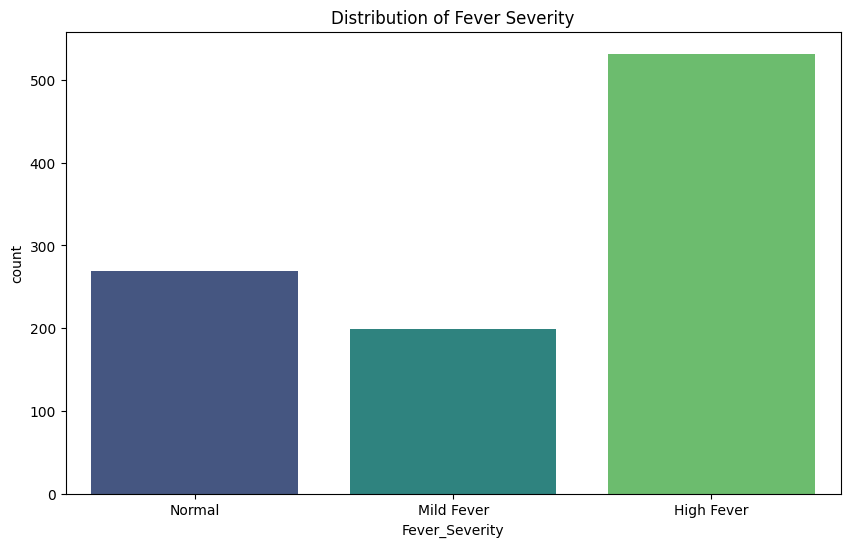

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Fever_Severity', palette='viridis')
plt.title("Distribution of Fever Severity")
plt.show()

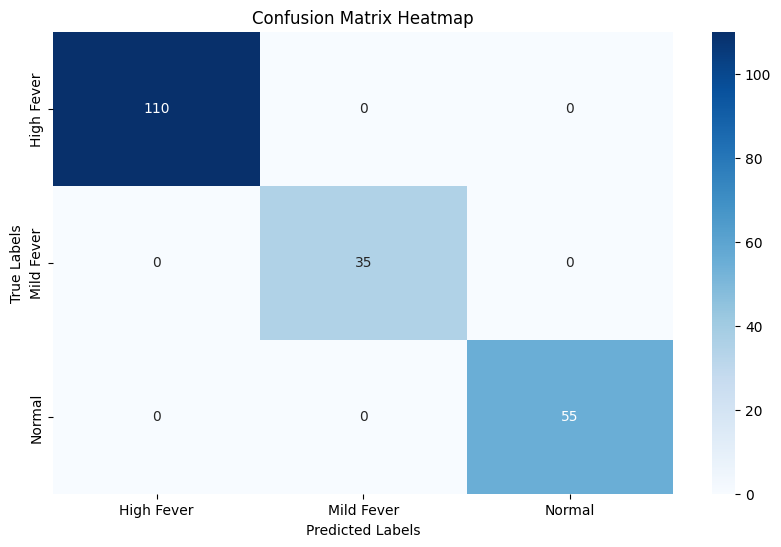

In [76]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [77]:
import numpy as np

sample_data = {
    'Temperature': [101.5],
    'Age': [25],
    'Gender': ['Male'],
    'BMI': [22.5],
    'Headache': ['Yes'],
    'Body_Ache': ['Yes'],
    'Fatigue': ['No'],
    'Chronic_Conditions': ['None'],
    'Allergies': ['None'],
    'Smoking_History': ['No'],
    'Alcohol_Consumption': ['No'],
    'Humidity': [45.0],
    'AQI': [70],
    'Physical_Activity': ['Moderate'],
    'Diet_Type': ['Vegetarian'],
    'Heart_Rate': [72],
    'Blood_Pressure': ['Normal'],
    'Previous_Medication': ['None'],
}


input_df = pd.DataFrame(sample_data)


def encode_with_fallback(df, encoder, column):
    """Encodes a column using an existing LabelEncoder with a fallback for unseen labels."""
    try:
        return encoder.transform(df[column])
    except ValueError:

        encoder.classes_ = np.append(encoder.classes_, df[column].unique())
        return encoder.transform(df[column])

categorical_columns = input_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    input_df[column] = encode_with_fallback(input_df, encoder, column)


numerical_columns = input_df.select_dtypes(include=['float64', 'int64']).columns
input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])


prediction = model.predict(input_df)
print("Predicted Fever Severity:", prediction[0])



Predicted Fever Severity: High Fever


In [78]:
# Define the sample input for a person with no fever
sample_data_no_fever = {
    'Temperature': [98.6],  # Normal temperature
    'Age': [30],
    'Gender': ['Female'],
    'BMI': [20.0],  # Healthy BMI
    'Headache': ['No'],  # No headache
    'Body_Ache': ['No'],  # No body ache
    'Fatigue': ['No'],  # No fatigue
    'Chronic_Conditions': ['None'],  # No chronic conditions
    'Allergies': ['None'],  # No allergies
    'Smoking_History': ['No'],  # Non-smoker
    'Alcohol_Consumption': ['No'],  # No alcohol consumption
    'Humidity': [50.0],  # Moderate humidity
    'AQI': [30],  # Good air quality index
    'Physical_Activity': ['Active'],  # Regular physical activity
    'Diet_Type': ['Balanced'],  # Balanced diet
    'Heart_Rate': [70],  # Normal heart rate
    'Blood_Pressure': ['Normal'],  # Normal blood pressure
    'Previous_Medication': ['None'],  # No previous medication
}

# Convert input to DataFrame
input_df_no_fever = pd.DataFrame(sample_data_no_fever)

# Encode categorical features with fallback
categorical_columns = input_df_no_fever.select_dtypes(include=['object']).columns
for column in categorical_columns:
    input_df_no_fever[column] = encode_with_fallback(input_df_no_fever, encoder, column)

# Scale numerical features
numerical_columns = input_df_no_fever.select_dtypes(include=['float64', 'int64']).columns
input_df_no_fever[numerical_columns] = scaler.transform(input_df_no_fever[numerical_columns])

# Predict the fever severity
prediction_no_fever = model.predict(input_df_no_fever)
print("Predicted Fever Severity:", prediction_no_fever[0])


Predicted Fever Severity: High Fever


In [79]:
print("Scaled Numerical Features:")
print(input_df_no_fever[numerical_columns])


Scaled Numerical Features:
   Temperature       Age     Gender       BMI  Headache  Body_Ache   Fatigue  \
0    53.150361 -0.732945  19.029481 -1.315288  10.97494   10.97494  11.01741   

   Chronic_Conditions  Allergies  Smoking_History  Alcohol_Consumption  \
0            2.969521   3.046951        10.987077            10.965608   

   Humidity       AQI  Physical_Activity  Diet_Type  Heart_Rate  \
0 -0.621374 -1.521185          12.079466  13.500925   -0.860678   

   Blood_Pressure  Previous_Medication  
0        9.896565             0.444898  


In [80]:
print("Unique values in training data for Gender:", data['Gender'].unique())
print("Unique values in input data for Gender:", sample_data['Gender'])


Unique values in training data for Gender: ['Female' 'Male']
Unique values in input data for Gender: ['Male']


In [81]:
print("Scaler mean:", scaler.mean_)
print("Scaler scale:", scaler.scale_)


Scaler mean: [ 38.0989  51.152    0.488   26.4432   0.515    0.515    0.492    0.516
   0.478    0.507    0.523   60.5944 248.493    0.962    0.972   80.144
   0.991    1.501 ]
Scaler scale: [  1.13830083  28.85891363   0.49985598   4.89869919   0.49977495
   0.49977495   0.499936     0.49974393   0.49951577   0.499951
   0.49947072  17.04994336 143.63337339   0.83099699   0.81683291
  11.78606228   0.80927066   1.12160555]


In [82]:
def encode_with_fallback(input_df, encoder, column):
    mapping = {category: i for i, category in enumerate(encoder.classes_)}
    return input_df[column].map(lambda x: mapping.get(x, -1))  # Use -1 for unseen labels


In [83]:
feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': model.feature_importances_
})
print(feature_importances.sort_values(by='Importance', ascending=False))


                Feature  Importance
0           Temperature    0.748677
3                   BMI    0.038563
11             Humidity    0.035680
12                  AQI    0.032723
1                   Age    0.031969
15           Heart_Rate    0.026512
17  Previous_Medication    0.012662
16       Blood_Pressure    0.010873
14            Diet_Type    0.008855
13    Physical_Activity    0.007669
4              Headache    0.006880
5             Body_Ache    0.005895
9       Smoking_History    0.005885
10  Alcohol_Consumption    0.005779
2                Gender    0.005712
6               Fatigue    0.005392
8             Allergies    0.005219
7    Chronic_Conditions    0.005054


In [84]:
# Verify encoded values
print("Gender Mapping:", encoder.classes_)
print("Encoded Input Gender:", input_df_no_fever['Gender'])

# Verify scaled values
print("Input Scaled Values:", input_df_no_fever[numerical_columns])

# Feature Importance
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
print("Feature Importance:")
print(feature_importances.sort_values(by='Importance', ascending=False))

# Predict probabilities
probabilities = model.predict_proba(input_df_no_fever)
print("Prediction Probabilities:", probabilities)


Gender Mapping: ['Aspirin' 'Ibuprofen' 'None' 'Paracetamol' 'Male' 'Yes' 'No' 'Moderate'
 'Vegetarian' 'Normal' 'Female' 'Active' 'Balanced']
Encoded Input Gender: 0    19.029481
Name: Gender, dtype: float64
Input Scaled Values:    Temperature       Age     Gender       BMI  Headache  Body_Ache   Fatigue  \
0    53.150361 -0.732945  19.029481 -1.315288  10.97494   10.97494  11.01741   

   Chronic_Conditions  Allergies  Smoking_History  Alcohol_Consumption  \
0            2.969521   3.046951        10.987077            10.965608   

   Humidity       AQI  Physical_Activity  Diet_Type  Heart_Rate  \
0 -0.621374 -1.521185          12.079466  13.500925   -0.860678   

   Blood_Pressure  Previous_Medication  
0        9.896565             0.444898  
Feature Importance:
                Feature  Importance
0           Temperature    0.748677
3                   BMI    0.038563
11             Humidity    0.035680
12                  AQI    0.032723
1                   Age    0.031969
15      

In [85]:
sample_data_no_fever = {
    'Temperature': [37.0],
    'Age': [30],
    'Gender': ['Female'],
    'BMI': [20.0],
    'Headache': ['No'],
    'Body_Ache': ['No'],
    'Fatigue': ['No'],
    'Chronic_Conditions': ['None'],
    'Allergies': ['None'],
    'Smoking_History': ['No'],
    'Alcohol_Consumption': ['No'],
    'Humidity': [50.0],
    'AQI': [30],
    'Physical_Activity': ['Active'],
    'Diet_Type': ['Balanced'],
    'Heart_Rate': [70],
    'Blood_Pressure': ['Normal'],
    'Previous_Medication': ['None'],
}


input_df_no_fever = pd.DataFrame(sample_data_no_fever)


categorical_columns = input_df_no_fever.select_dtypes(include=['object']).columns
for column in categorical_columns:
    input_df_no_fever[column] = encode_with_fallback(input_df_no_fever, encoder, column)


numerical_columns = input_df_no_fever.select_dtypes(include=['float64', 'int64']).columns
input_df_no_fever[numerical_columns] = scaler.transform(input_df_no_fever[numerical_columns])


prediction_no_fever = model.predict(input_df_no_fever)
print("Predicted Fever Severity:", prediction_no_fever[0])


Predicted Fever Severity: Normal


**😭 It WORKS**